# 🚢 Task 5: Exploratory Data Analysis on Titanic Dataset
This task explores the Titanic dataset to uncover patterns, trends, and insights using Python's EDA tools like Pandas, Seaborn, and Matplotlib. The goal is to build familiarity with data profiling, visualization, and storytelling through data.


In [2]:
# 1. Import Required Libraries

import pandas as pd                    # For data manipulation and analysis
import numpy as np                     # For numerical operations
import seaborn as sns                  # For visualizations
import matplotlib.pyplot as plt        # For plotting charts
import warnings                        # To handle warning messages
warnings.filterwarnings('ignore')     # Ignore warnings for cleaner output

In [7]:
# 2. Extract the Titanic Dataset

!unzip titanic.zip

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [8]:
# Load the training dataset into a pandas DataFrame

train = pd.read_csv('train.csv')

In [9]:
## Check the Shape of the Dataset

# Display the number of rows and columns in the dataset
train.shape

(891, 12)

The dataset contains 891 rows and 12 columns.  
This means there are 891 passenger records with 12 features each, including survival status, personal details, and travel information.


In [10]:
## Check for Missing Values

# Check the number of missing values in each column
train.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


The dataset has missing values in the following columns:

- **Age**: 177 missing entries — needs imputation or treatment.
- **Cabin**: 687 missing values — over 75% missing, may be dropped or processed differently.
- **Embarked**: 2 missing entries — can be filled with the most frequent category.

All other columns are complete and have no missing values.

In [11]:
## Explore the 'Target' Feature

# Display the 'Sex' column to examine gender distribution
train['Sex']

,Sex
0,male
1,female
2,female
3,female
4,male
...,...
886,male
887,female
888,female
889,male


In [12]:
## Statistical Summary of Numerical Features

# Generate summary statistics for numerical columns in the dataset
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


This provides a statistical overview of the numerical features in the dataset:

- **Survived**: Binary target variable (0 = did not survive, 1 = survived); about 38.4% of passengers survived on average.
- **Age**: Mean age is ~29.7 years with a wide range from 0.42 to 80.
- **Fare**: Highly skewed with a maximum fare of over 512; 75% of passengers paid less than 31.
- **SibSp / Parch**: Most passengers traveled with few or no family members.
- **Pclass**: Majority of passengers belonged to class 3 (check 75% value = 3.0).
- **PassengerId**: Just an identifier, increasing linearly.

These statistics help spot potential outliers, skewness (in Fare), and guide decisions for data normalization or feature engineering.


In [13]:
## Check for Duplicate or Repeated Records Using `.value_counts()`

# Count the frequency of each unique row to identify any duplicates or repeated entries
train.value_counts()

,,,,,,,,,,,,count
PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,1
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,1
873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,1
880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,1


This command counts how many times each **full row** appears in the dataset.

- The output shows that each listed row has a count of `1`, which means these rows are **unique**.
- There are **no exact duplicate rows** in this dataset.
- This is useful for verifying data integrity before performing deeper analysis or modeling.


In [14]:
## Correlation Matrix of Numerical Features

# Compute the correlation matrix for all numerical features
corr = train.corr(numeric_only=True)
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


The correlation matrix shows the strength and direction of linear relationships between numeric features:

- **Survived vs Pclass**: Strong negative correlation (-0.34), indicating passengers in lower classes were less likely to survive.
- **Survived vs Fare**: Moderate positive correlation (0.26), suggesting passengers who paid higher fares had better survival chances.
- **Pclass vs Fare**: Strong negative correlation (-0.55), as expected — higher class → higher fare.
- **SibSp and Parch** are moderately correlated with each other (0.41), representing family-related travel patterns.
- **Age** is slightly negatively correlated with survival (-0.07), implying younger passengers had slightly better odds, though weak.

These insights help prioritize which features may be more influential during modeling.


<Axes: >

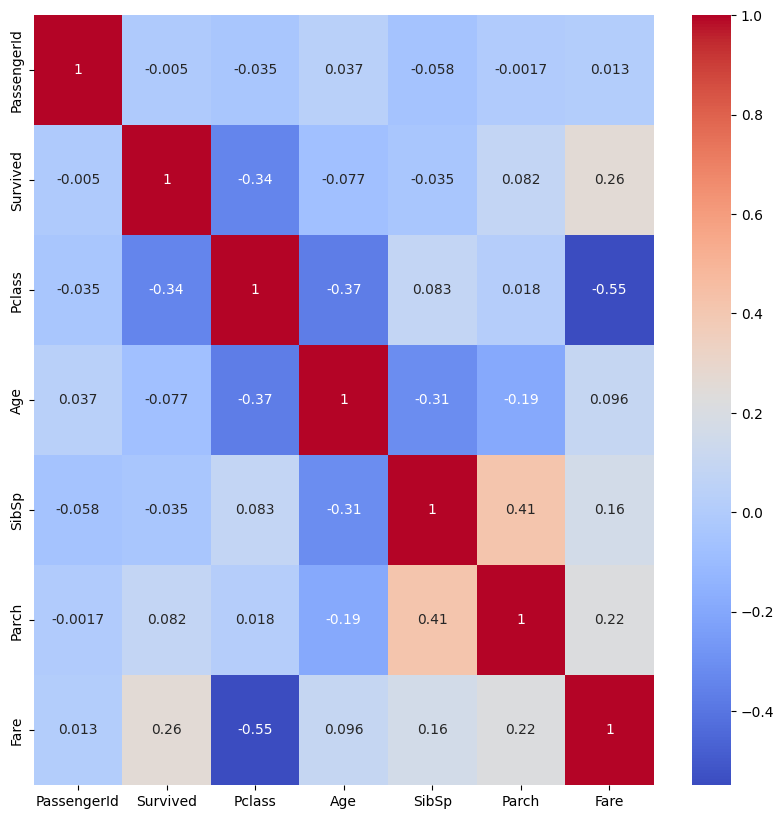

In [15]:
## Correlation Heatmap of Titanic Dataset Features

# This heatmap visualizes the pairwise correlation between numerical features in the Titanic dataset.
#It helps identify relationships between variables such as `Fare`, `Pclass`, `Age`, and `Survived`, which can guide feature selection and model building.


# Plotting a heatmap to show correlation between features
# This helps identify strong positive or negative relationships (e.g., Fare vs Pclass)
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

###  Observations from the Correlation Heatmap:

1. **Fare & Pclass** have a strong **negative correlation (-0.55)**: As class number increases (lower class), fare tends to decrease.
2. **Fare & Survived** show a **moderate positive correlation (0.26)**: People who paid higher fares had a better chance of survival.
3. **Pclass & Survived** show a **moderate negative correlation (-0.34)**: Higher-class passengers (Pclass = 1) had a higher survival rate.
4. **Age** is **negatively correlated with Pclass (-0.37)** and **SibSp (-0.31)**, meaning older people were more likely to travel alone and in higher classes.
5. **SibSp & Parch** show a **positive correlation (0.41)**: People traveling with siblings/spouses often also had parents/children with them.
6. Other correlations are relatively weak (close to 0), showing little linear relationship.

These insights are useful for feature selection in model training.


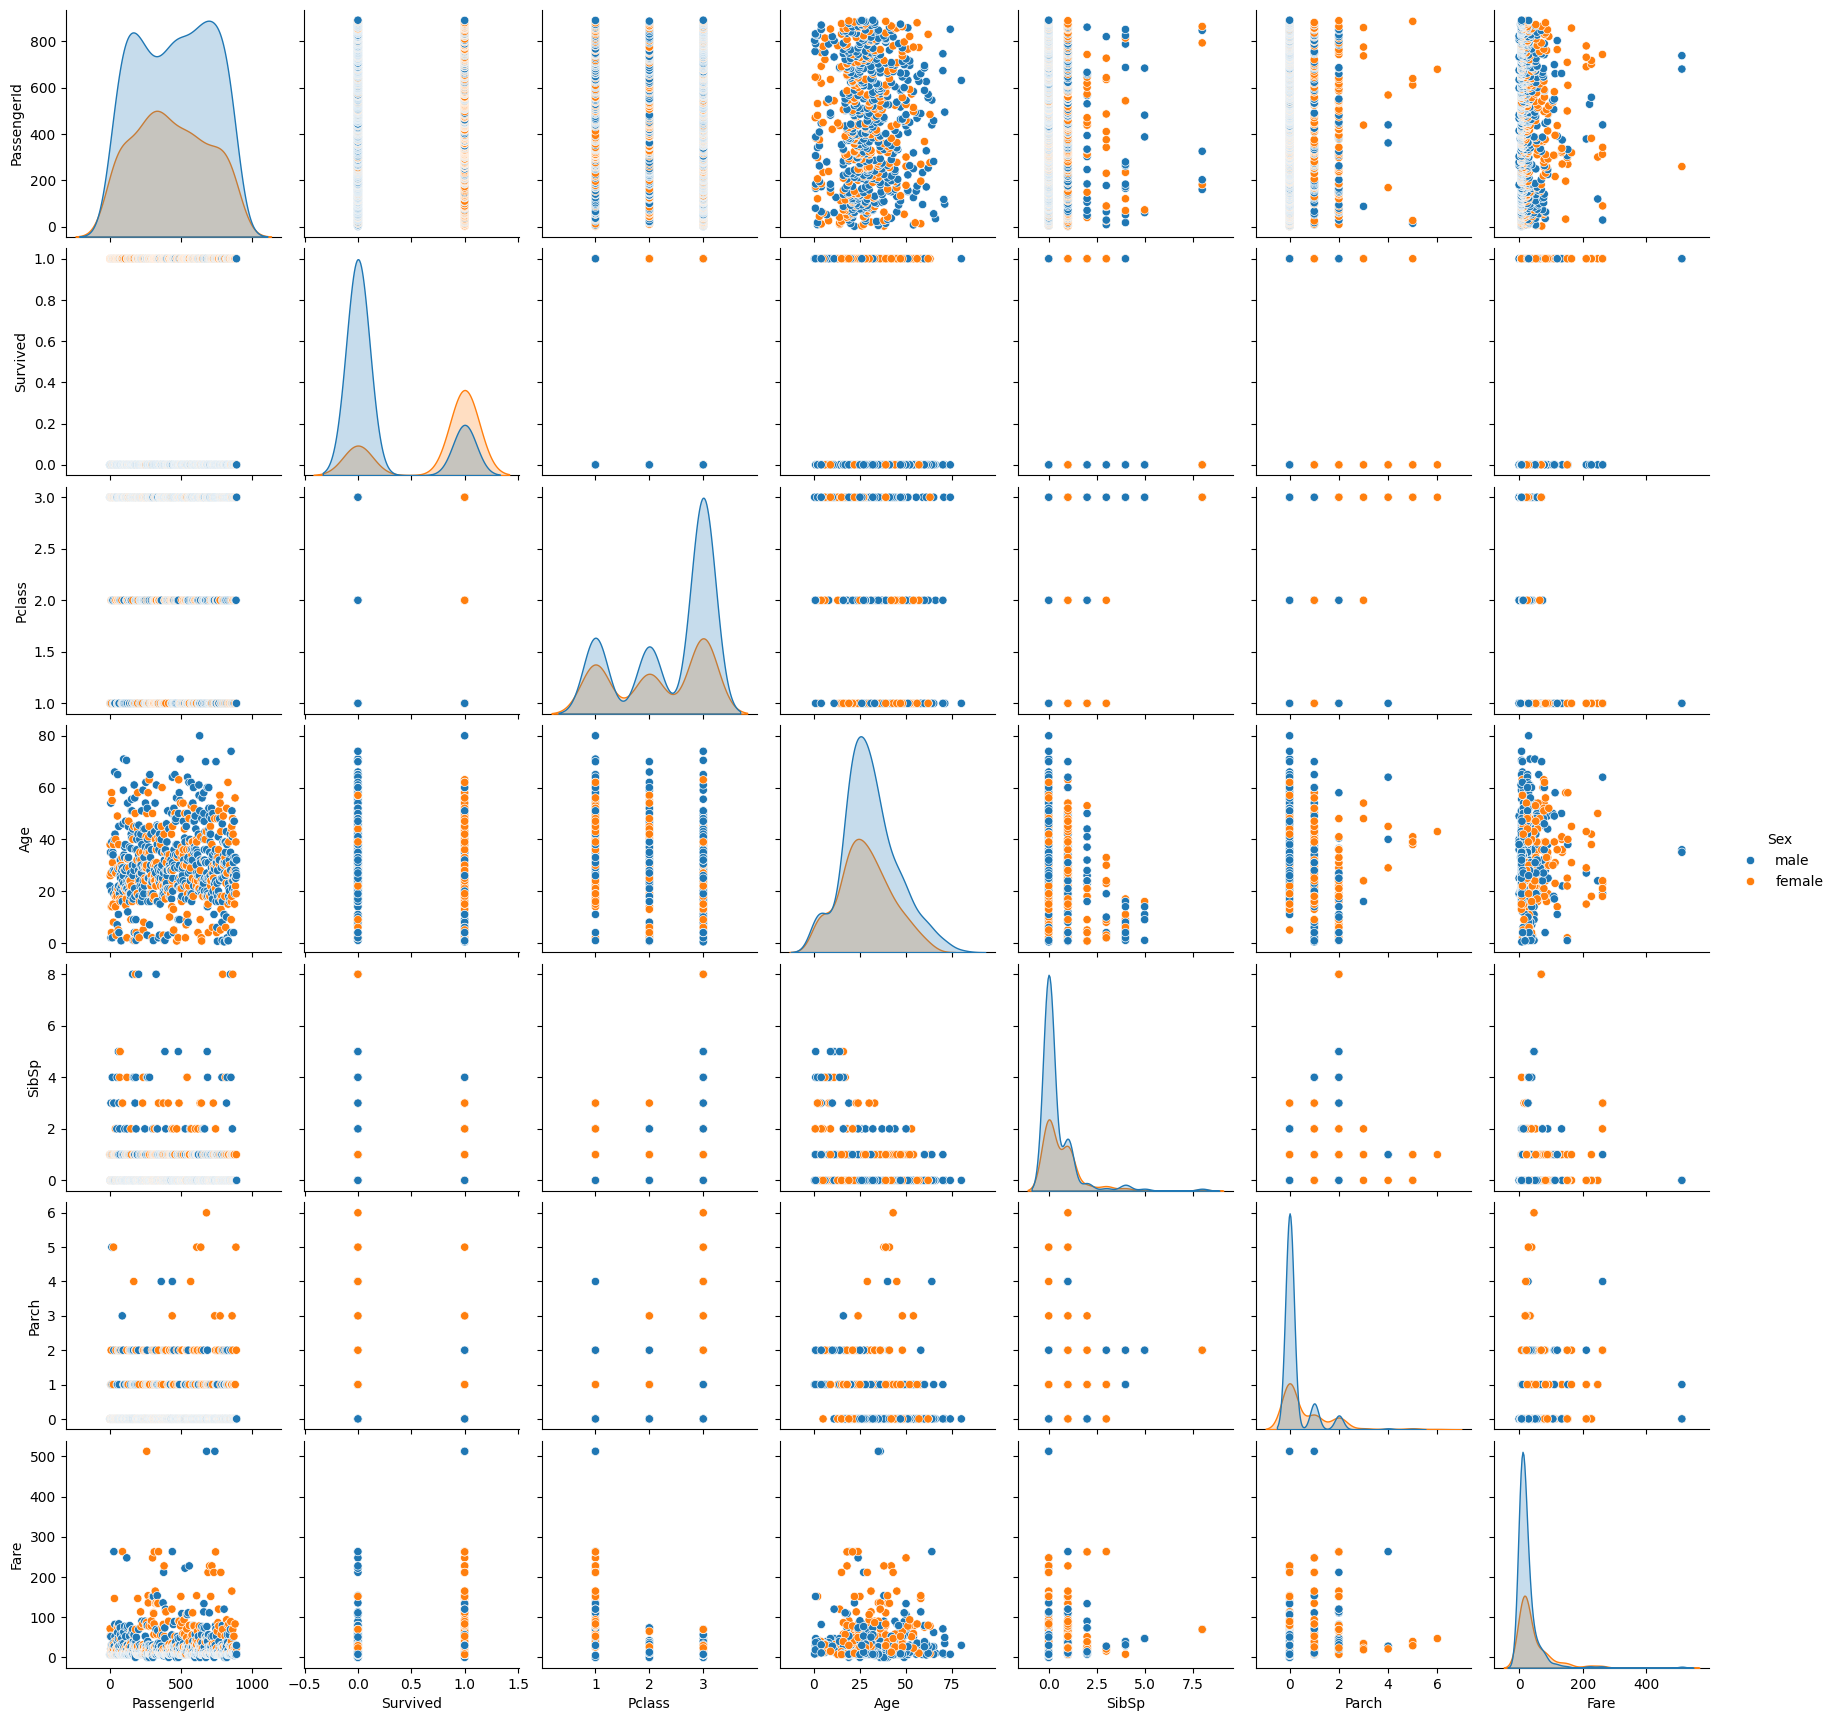

In [ ]:
## Pair Plot to Visualize Feature Relationships by Gender

# This pair plot shows scatterplots and distributions of numeric features in the Titanic dataset, separated by passenger gender.
# It helps visualize how features like Age, Fare, and Pclass vary between male and female passengers.


# Creating a pair plot to visualize pairwise relationships between numerical features
# The 'hue' parameter separates data points by gender (male/female)
sns.pairplot(data=train, hue='Sex')
plt.show()


### Observations from the Pair Plot:

1. **Age Distribution**: Both males and females are spread across all age groups, but more younger females survived.
2. **Fare vs Pclass**: First-class passengers (Pclass=1) paid higher fares; many of them were female.
3. **Survival**: A higher proportion of females survived compared to males, especially in first class.
4. **Fare Distribution**: Fare values are highly skewed with a few very high fares.
5. **SibSp & Parch**: Most passengers had zero siblings/spouses or parents/children with them, with few exceptions.
6. **Cluster Trends**: Some separation is visible in Age-Fare and Age-Pclass combinations for male and female groups.

This visualization is helpful to understand gender-based trends and feature distributions.


In [18]:
## Extracting Numerical Columns from the Dataset

# Selecting only numerical columns (int64 and float64 types) from the training dataset
num = train.select_dtypes(include=['float64', 'int64'])
num.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

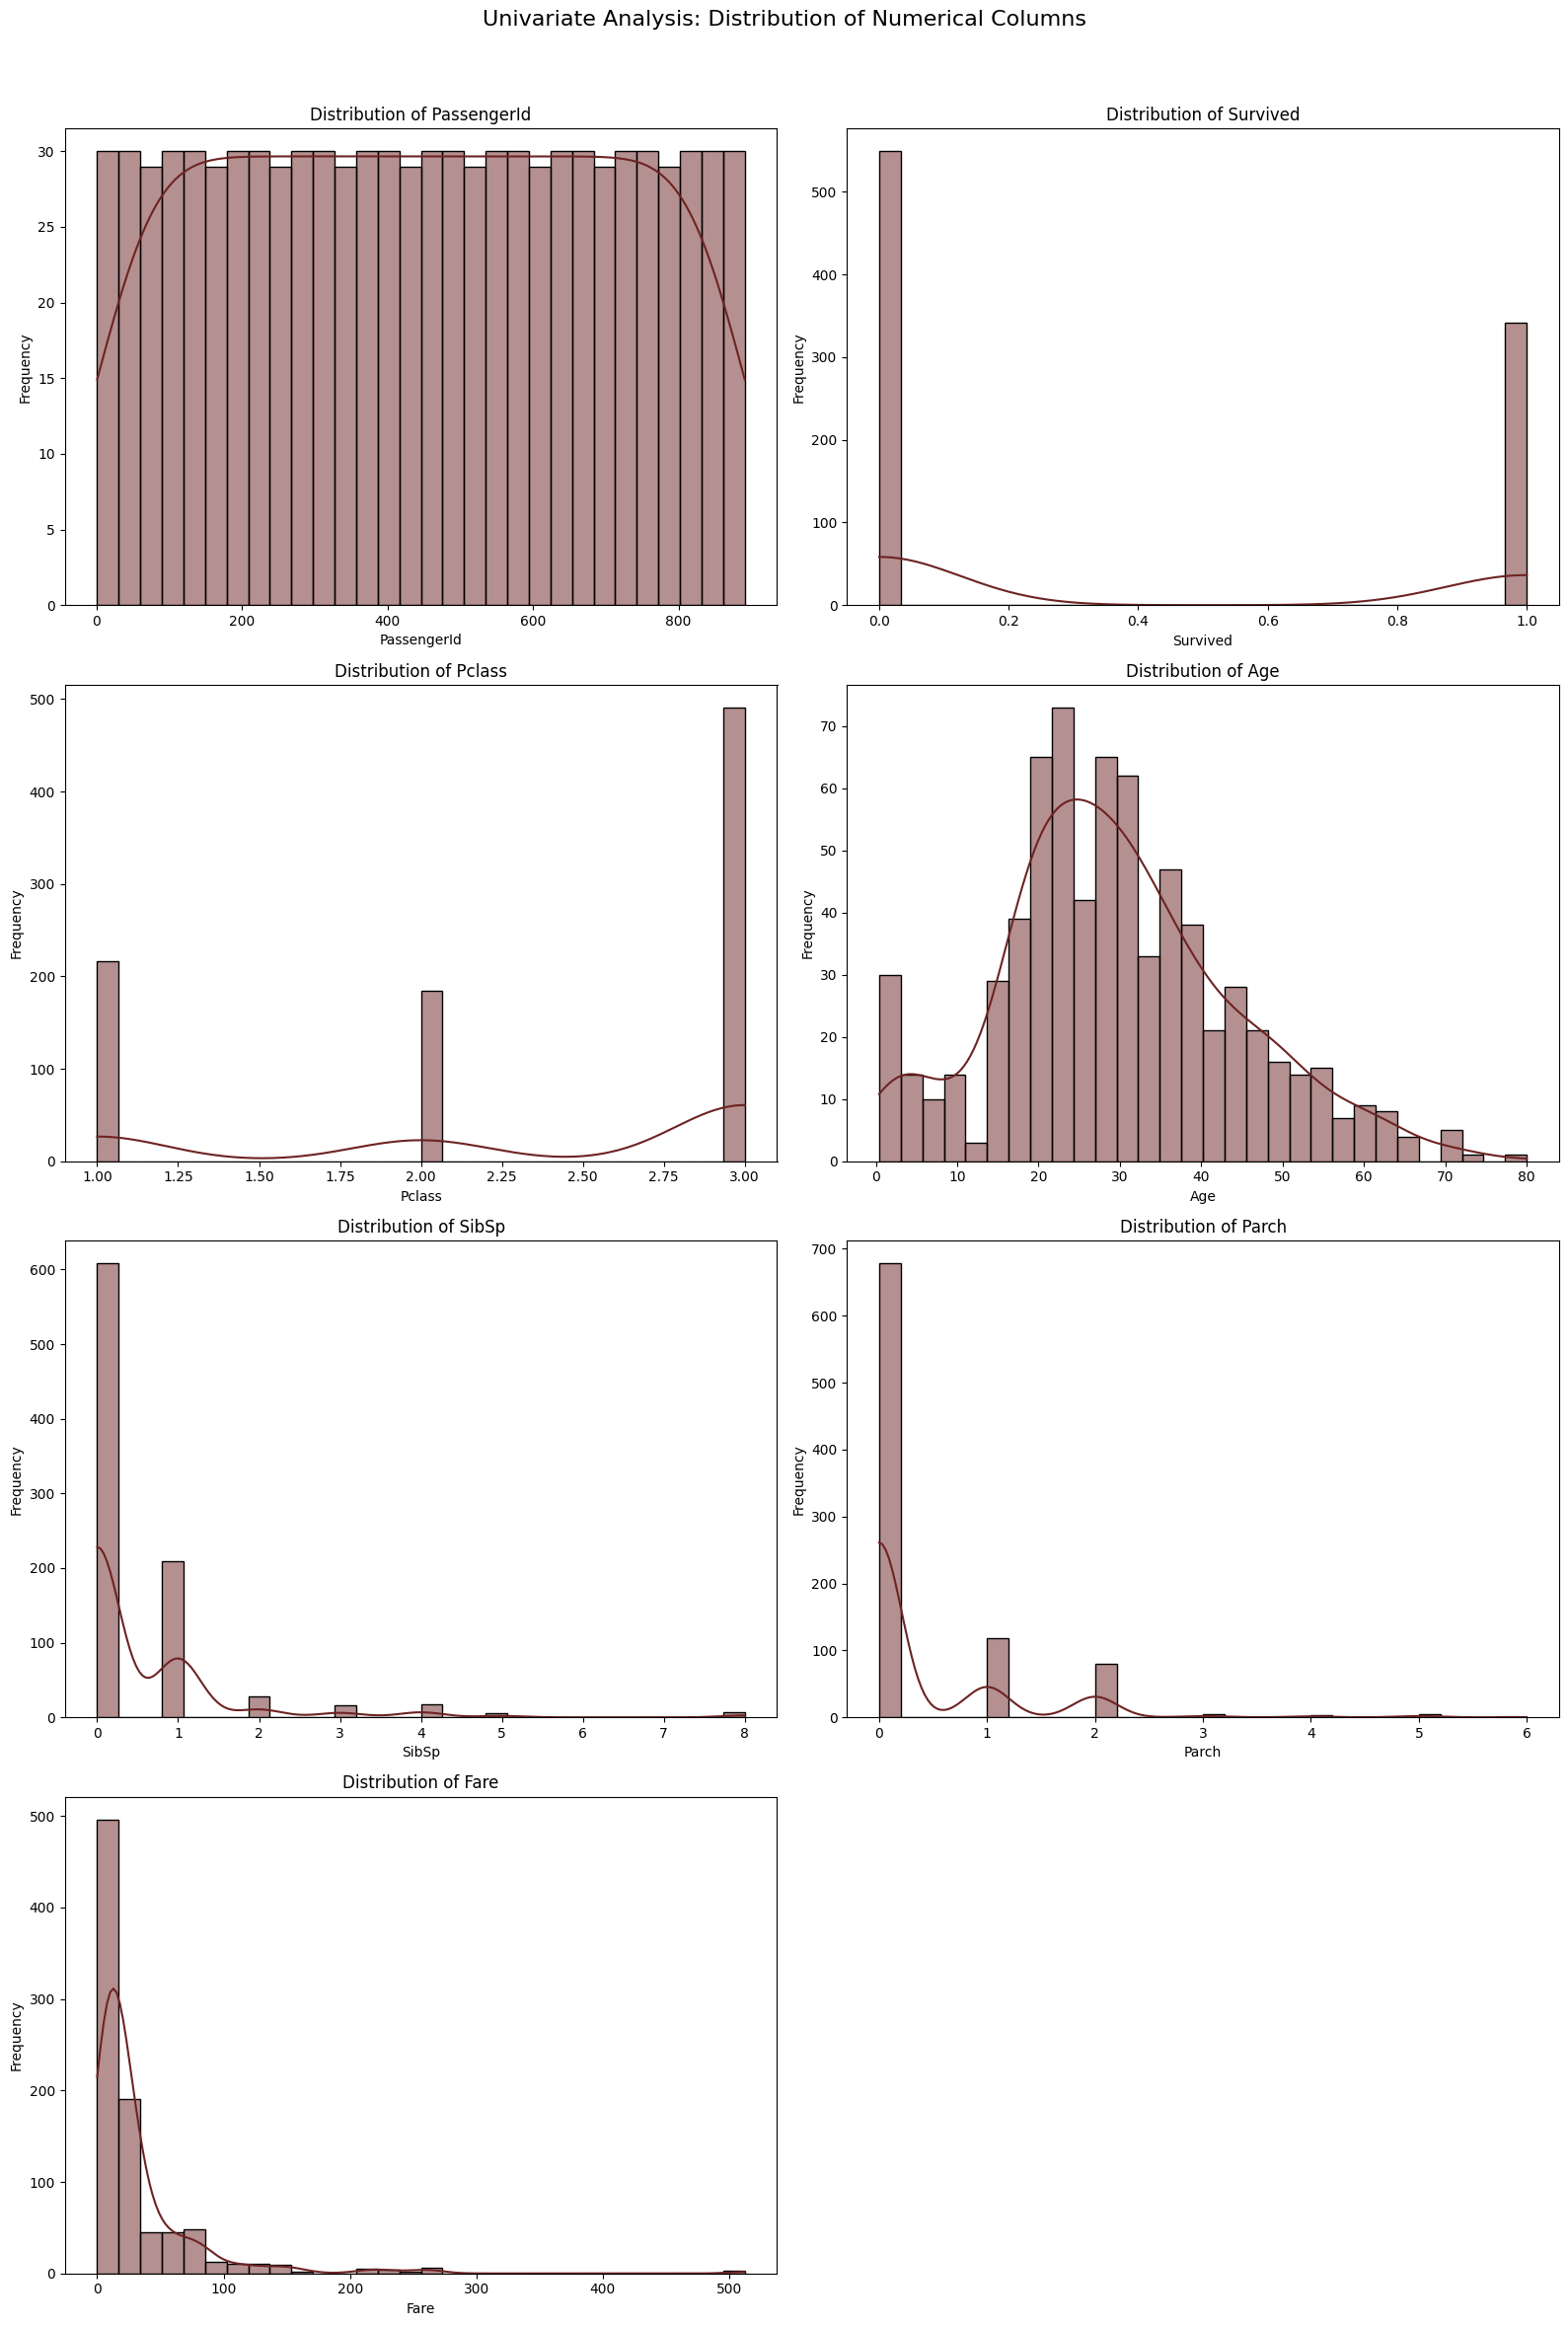

In [ ]:
## Univariate Analysis: Distribution of Numerical Columns

# Plotting histograms for numerical columns
# This helps to understand the distribution of each variable individually

numeric_cols = train.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(16, 24))
plt.suptitle('Univariate Analysis: Distribution of Numerical Columns', fontsize=16)

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 2, i)
    sns.histplot(train[col], kde=True, bins=30, color='#6D2323')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# plt.savefig("Distribution of Numerical Columns.png")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Observations:

- **PassengerId**: Uniformly distributed; used mostly as an index.
- **Survived**: Binary variable showing more people did not survive.
- **Pclass**: Most passengers were in 3rd class.
- **Age**: Right-skewed distribution with a peak around age 20–30.
- **SibSp** and **Parch**: Most values are 0, meaning many passengers traveled alone.
- **Fare**: Highly right-skewed; most passengers paid lower fares, but a few paid very high fares (outliers).


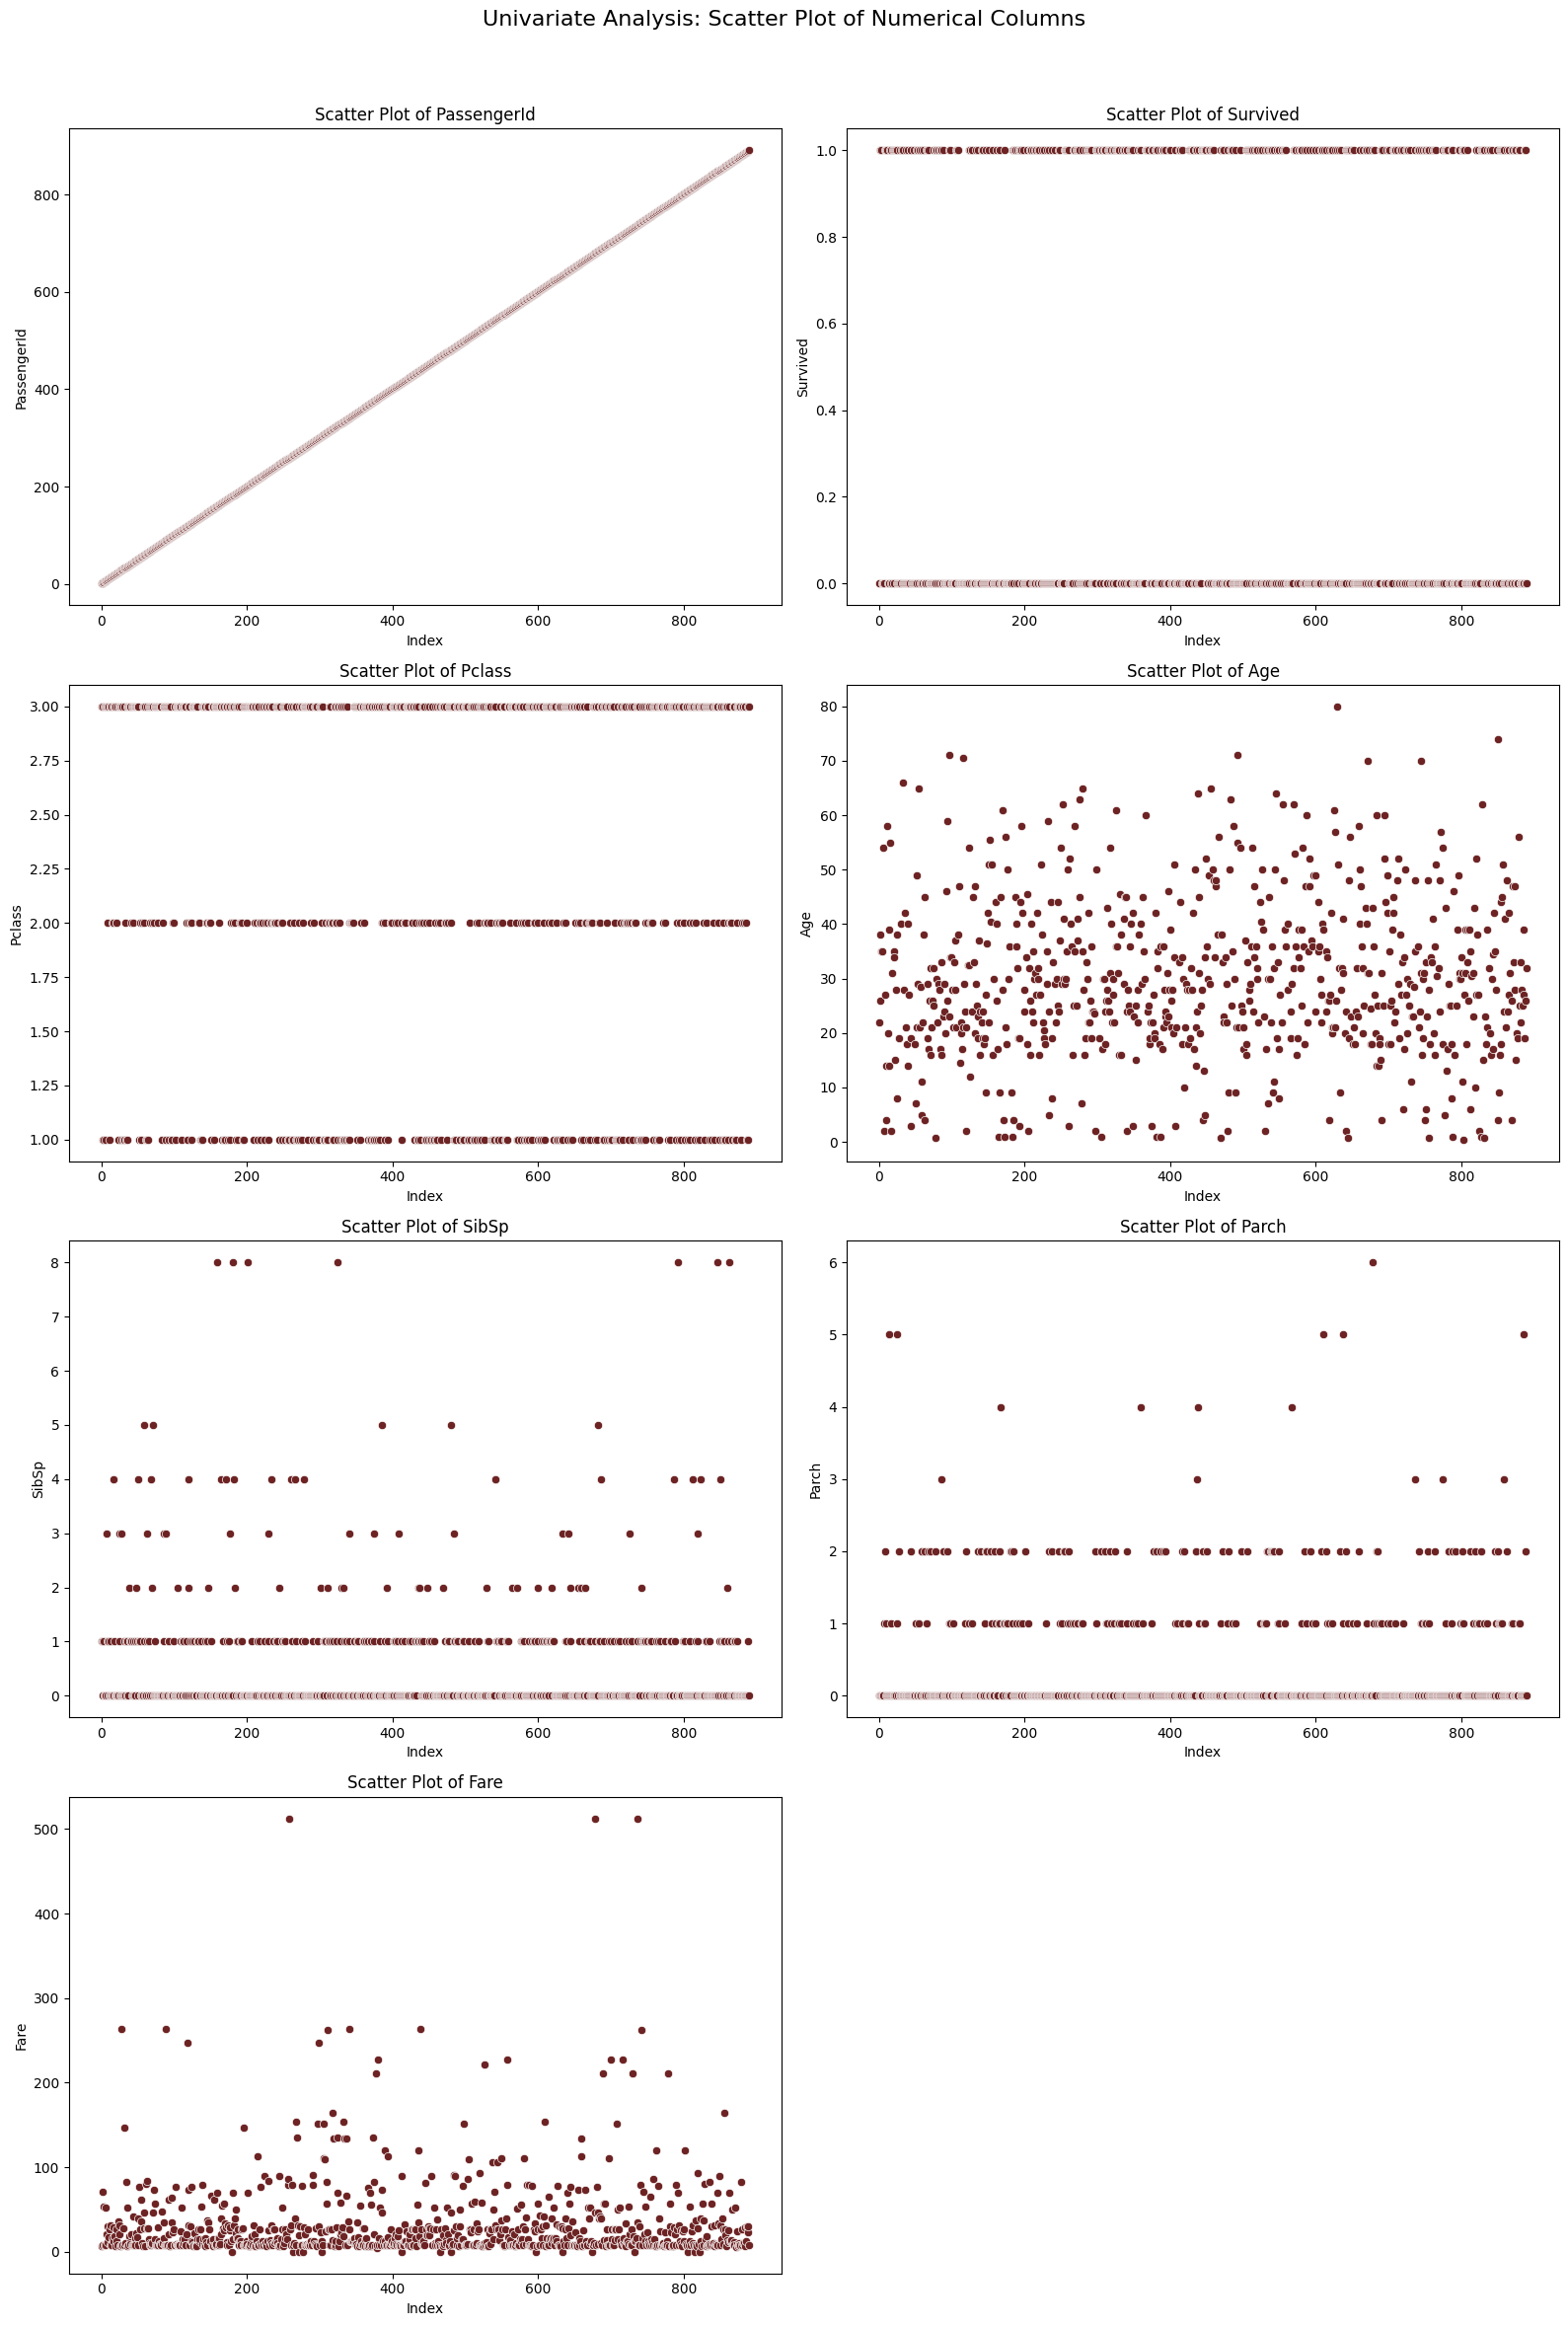

In [20]:
# Scatter plots of numerical columns with respect to their index
# This helps visualize the spread of each variable across rows

numeric_cols = train.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(16, 24))
plt.suptitle('Univariate Analysis: Scatter Plot of Numerical Columns', fontsize=16)

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 2, i)
    sns.scatterplot(x=train.index, y=train[col], color='#6D2323')
    plt.title(f'Scatter Plot of {col}')
    plt.xlabel('Index')
    plt.ylabel(col)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


| **Plot**        | **What it Actually Shows**                                                              |
| --------------- | --------------------------------------------------------------------------------------- |
| **PassengerId** | A straight diagonal line — values increase linearly with row index.                     |
| **Survived**    | 0s and 1s scattered — binary classification. Tells how survival is distributed per row. |
| **Pclass**      | Three distinct horizontal lines — Classes 1, 2, 3. Shows class distribution clearly.    |
| **Age**         | Age values spread between 0 and \~80 — scattered randomly, helps spot outliers/missing. |
| **SibSp**       | Discrete values like 0,1,2,5,8 — again clearly separated horizontal bands.              |
| **Parch**       | Mostly low values (0–3) — few outliers, low family dependency for most passengers.      |
| **Fare**        | Values are skewed — clustered under 100 with some large outliers (\~500).               |


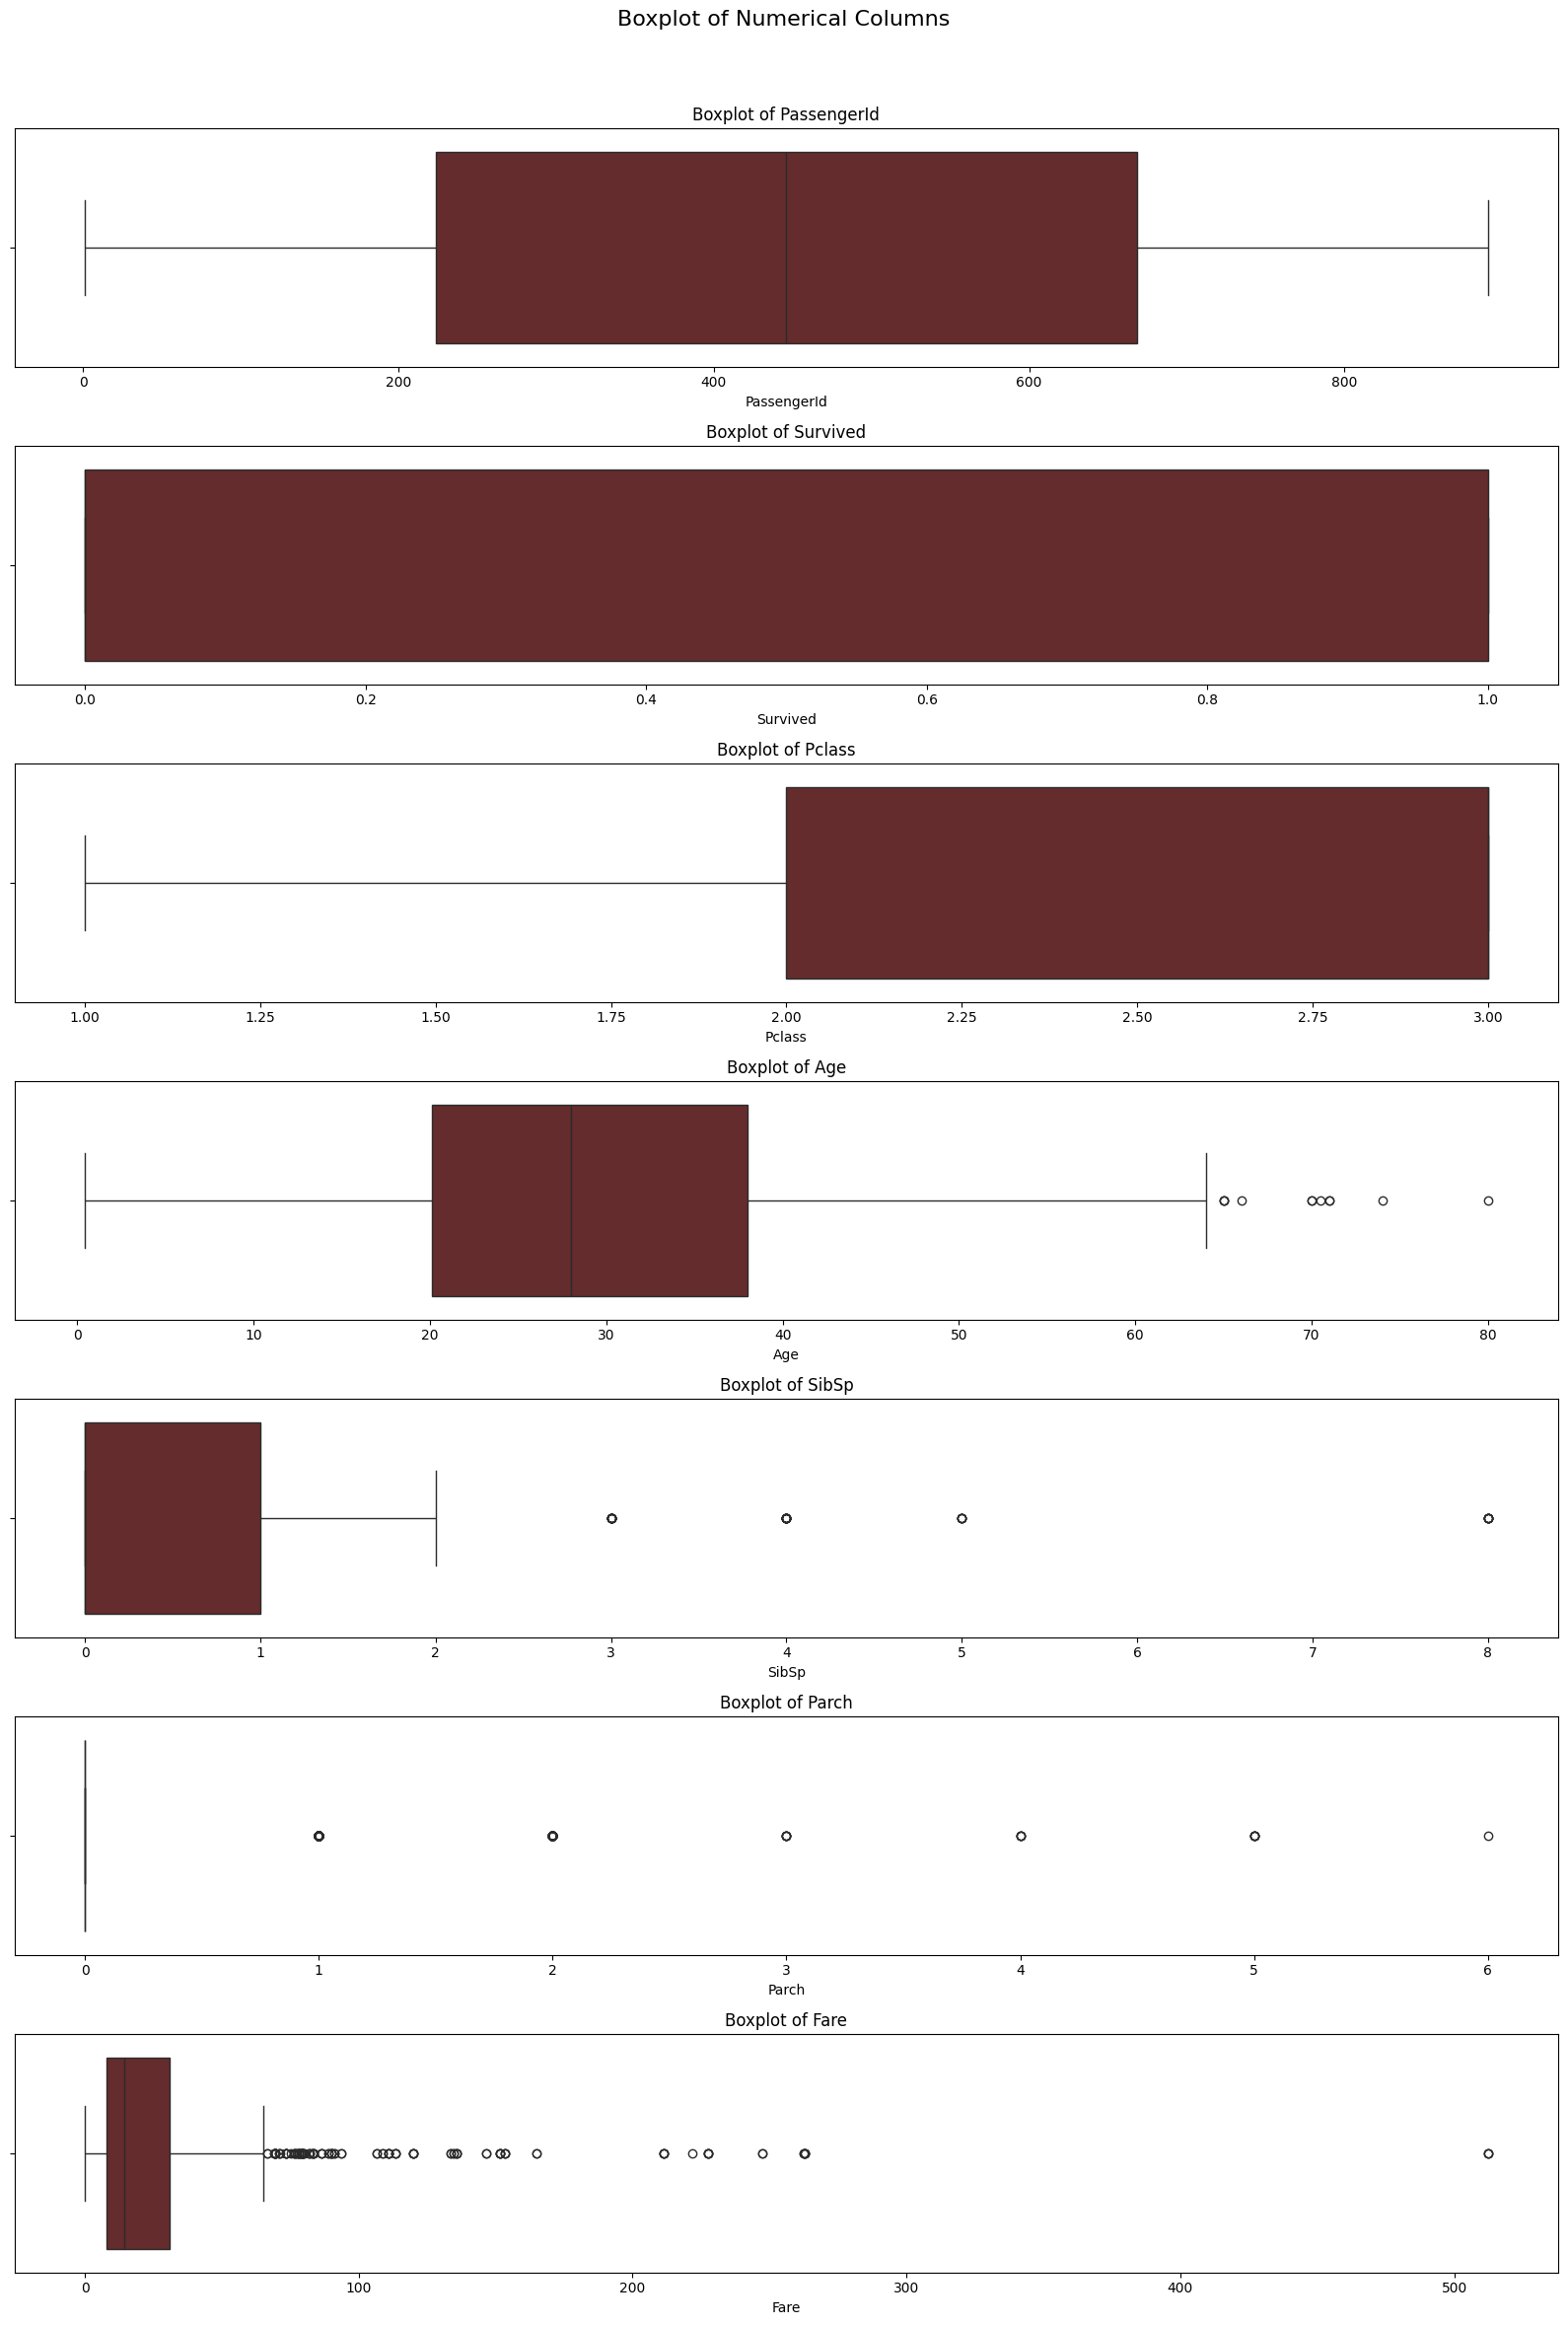

In [21]:
# Select only numerical columns
numeric_cols = train.select_dtypes(include=['float64', 'int64']).columns

# Set the figure size
plt.figure(figsize=(16, 24))
plt.suptitle('Boxplot of Numerical Columns', fontsize=16)

# Plot each numerical column as a boxplot
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=train[col], color='#6D2323')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## Boxplot Analysis of Numerical Columns

The boxplots below provide a visual summary of the distribution and presence of outliers in the numerical features of the Titanic dataset.

### 1. **PassengerId**
- Represents sequential passenger identifiers.
- Distribution appears uniform.
- No outliers observed.

### 2. **Survived**
- Binary feature: `0 = Not Survived`, `1 = Survived`.
- No outliers due to binary nature.
- Extremely compact distribution.

### 3. **Pclass**
- Represents ticket class (`1`, `2`, `3`).
- Skewed toward class 3.
- No outliers; acts as a categorical variable.

### 4. **Age**
- Age range is well distributed.
- Median age lies between 28–30 years.
- Outliers observed above the upper whisker, indicating some elderly passengers.

### 5. **SibSp** (Siblings/Spouses Aboard)
- Most values are `0` or `1`.
- Outliers present beyond 3, indicating some passengers were traveling with larger families.

### 6. **Parch** (Parents/Children Aboard)
- Most passengers had no parents/children aboard.
- Outliers visible beyond 2, showing a few passengers had larger family groups.

### 7. **Fare**
- Strongly right-skewed distribution.
- Majority of fares are low.
- Significant outliers above 100, with some above 500, indicating first-class tickets or group purchases.

---

### Conclusion
- **Outliers** are significantly present in `Fare`, followed by `Age`, `SibSp`, and `Parch`.
- `Survived`, `Pclass`, and `PassengerId` show clean distributions with no outliers.
- Special attention is needed for skewed data like `Fare`—consider transformations (e.g., log scale).
